In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

#im = Image.open("../../NEW_CITRIX_DATA/impoundment_uppsala_4x4_05m_ClipGrid.tif")

In [2]:
predictions = np.load("../Slutexperiment/predictions.npy")

In [3]:
predictions.shape

(11, 3, 7852140)

In [4]:
test0 = predictions[0, 0]
test1 = predictions[0, 1]
test2 = predictions[0, 2]

In [5]:
test0 = test0.reshape(2997, 2620)
test1 = test1.reshape(2997, 2620)
test2 = test2.reshape(2997, 2620)

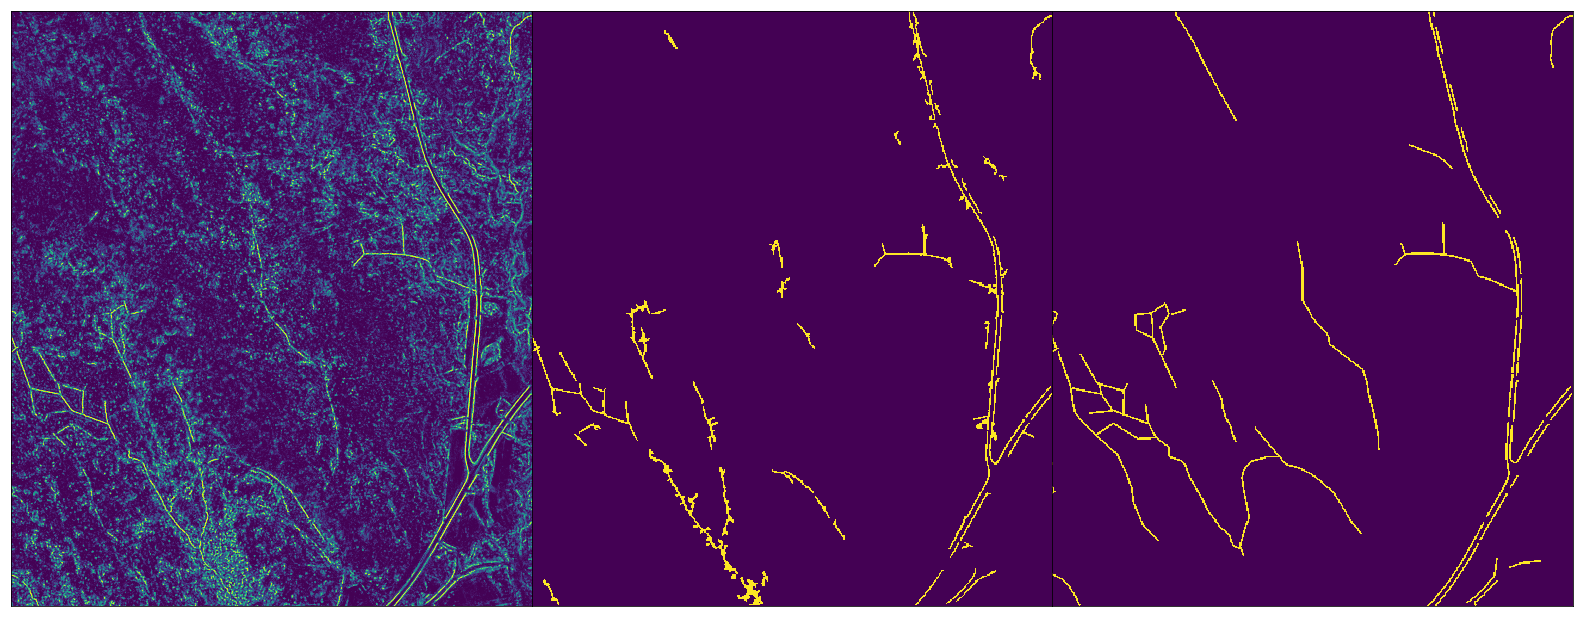

In [6]:
plt.figure(num=None, figsize=(28,36), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,3,i+1) for i in range(3)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)


ax[0].imshow(test0)

ax[1].imshow(test1)

ax[2].imshow(test2)


In [7]:
for k in range(0,11):
    test1 = predictions[k, 1]
    test2 = np.load(f"../Slutexperiment/new_labels_zone_{k+1}.npy")
    test1 = test1.reshape(2997, 2620)
    test2 = test2.reshape(2997, 2620)
    newTiff = Image.new("L", (2620, 2997))
    pixels = newTiff.load()
    for i in range(newTiff.size[0]):
        for j in range(newTiff.size[1]):
            if test2[j][i] == 1 and test1[j][i] == 1: # true positive
                pixels[i,j] = (1)
            elif test2[j][i] == 1 and test1[j][i] == 0: # false negative
                pixels[i,j] = (2)
            elif test2[j][i] == 0 and test1[j][i] == 1: # false positive
                pixels[i,j] = (3)
            else: #true negative
                pixels[i,j] = (0)
    newTiff.save(f"../Slutexperiment/zone_results_new_labels_{11+k}.tif")

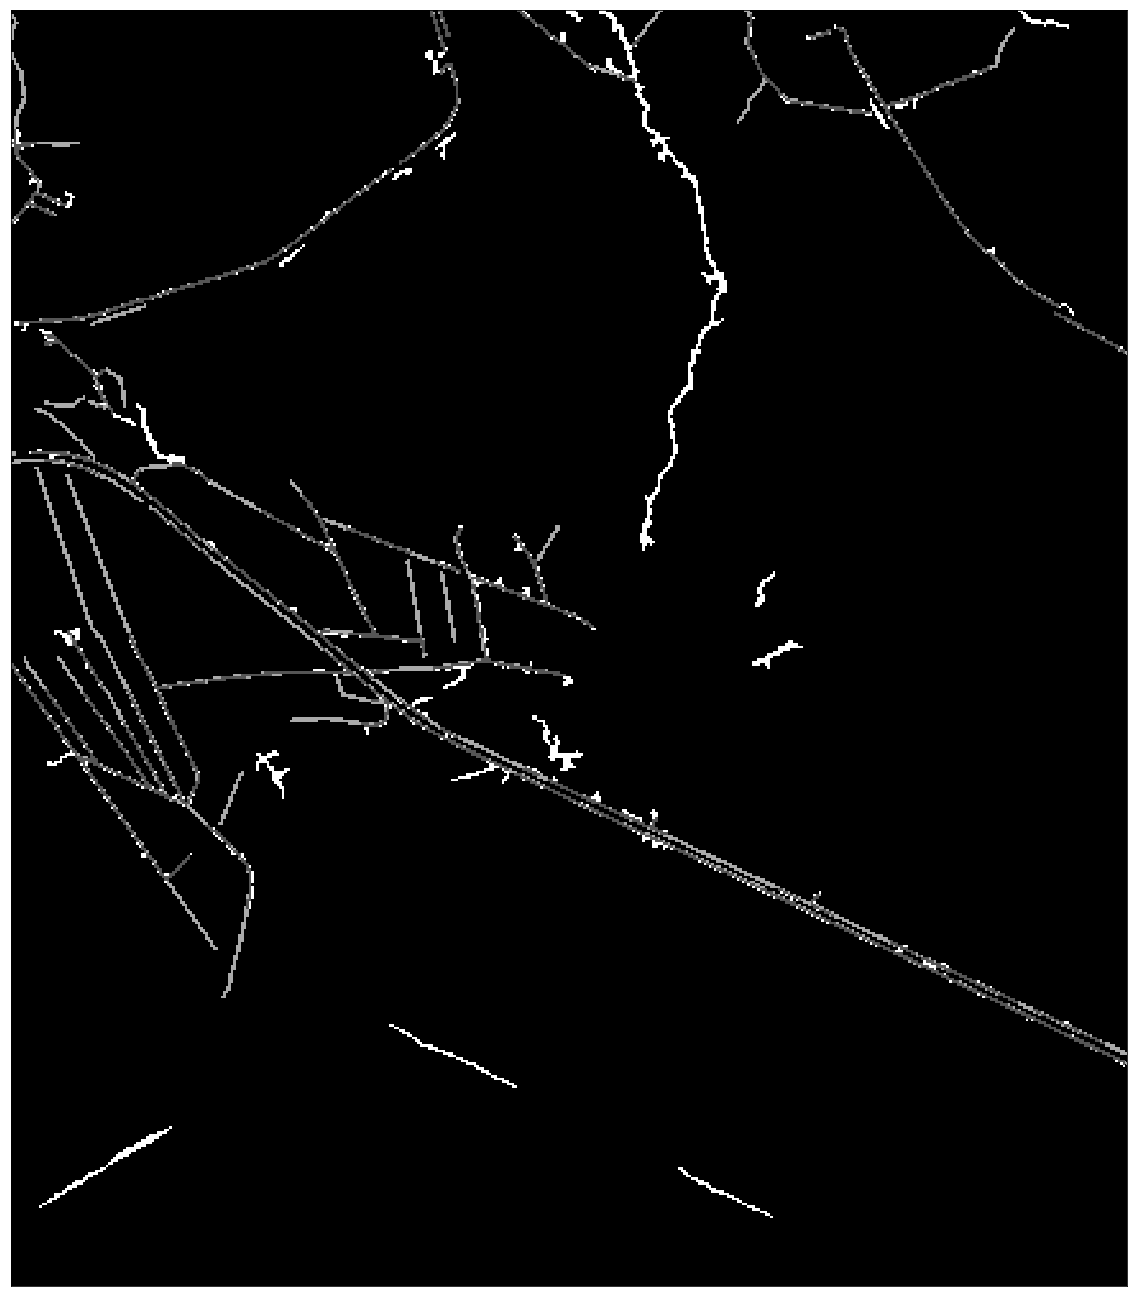

In [23]:
plt.figure(num=None, figsize=(20,30), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0.01,hspace=0)

ax[0].imshow(np.array(Image.open("../Slutexperiment/zone_results_13.tif")), cmap="gray")

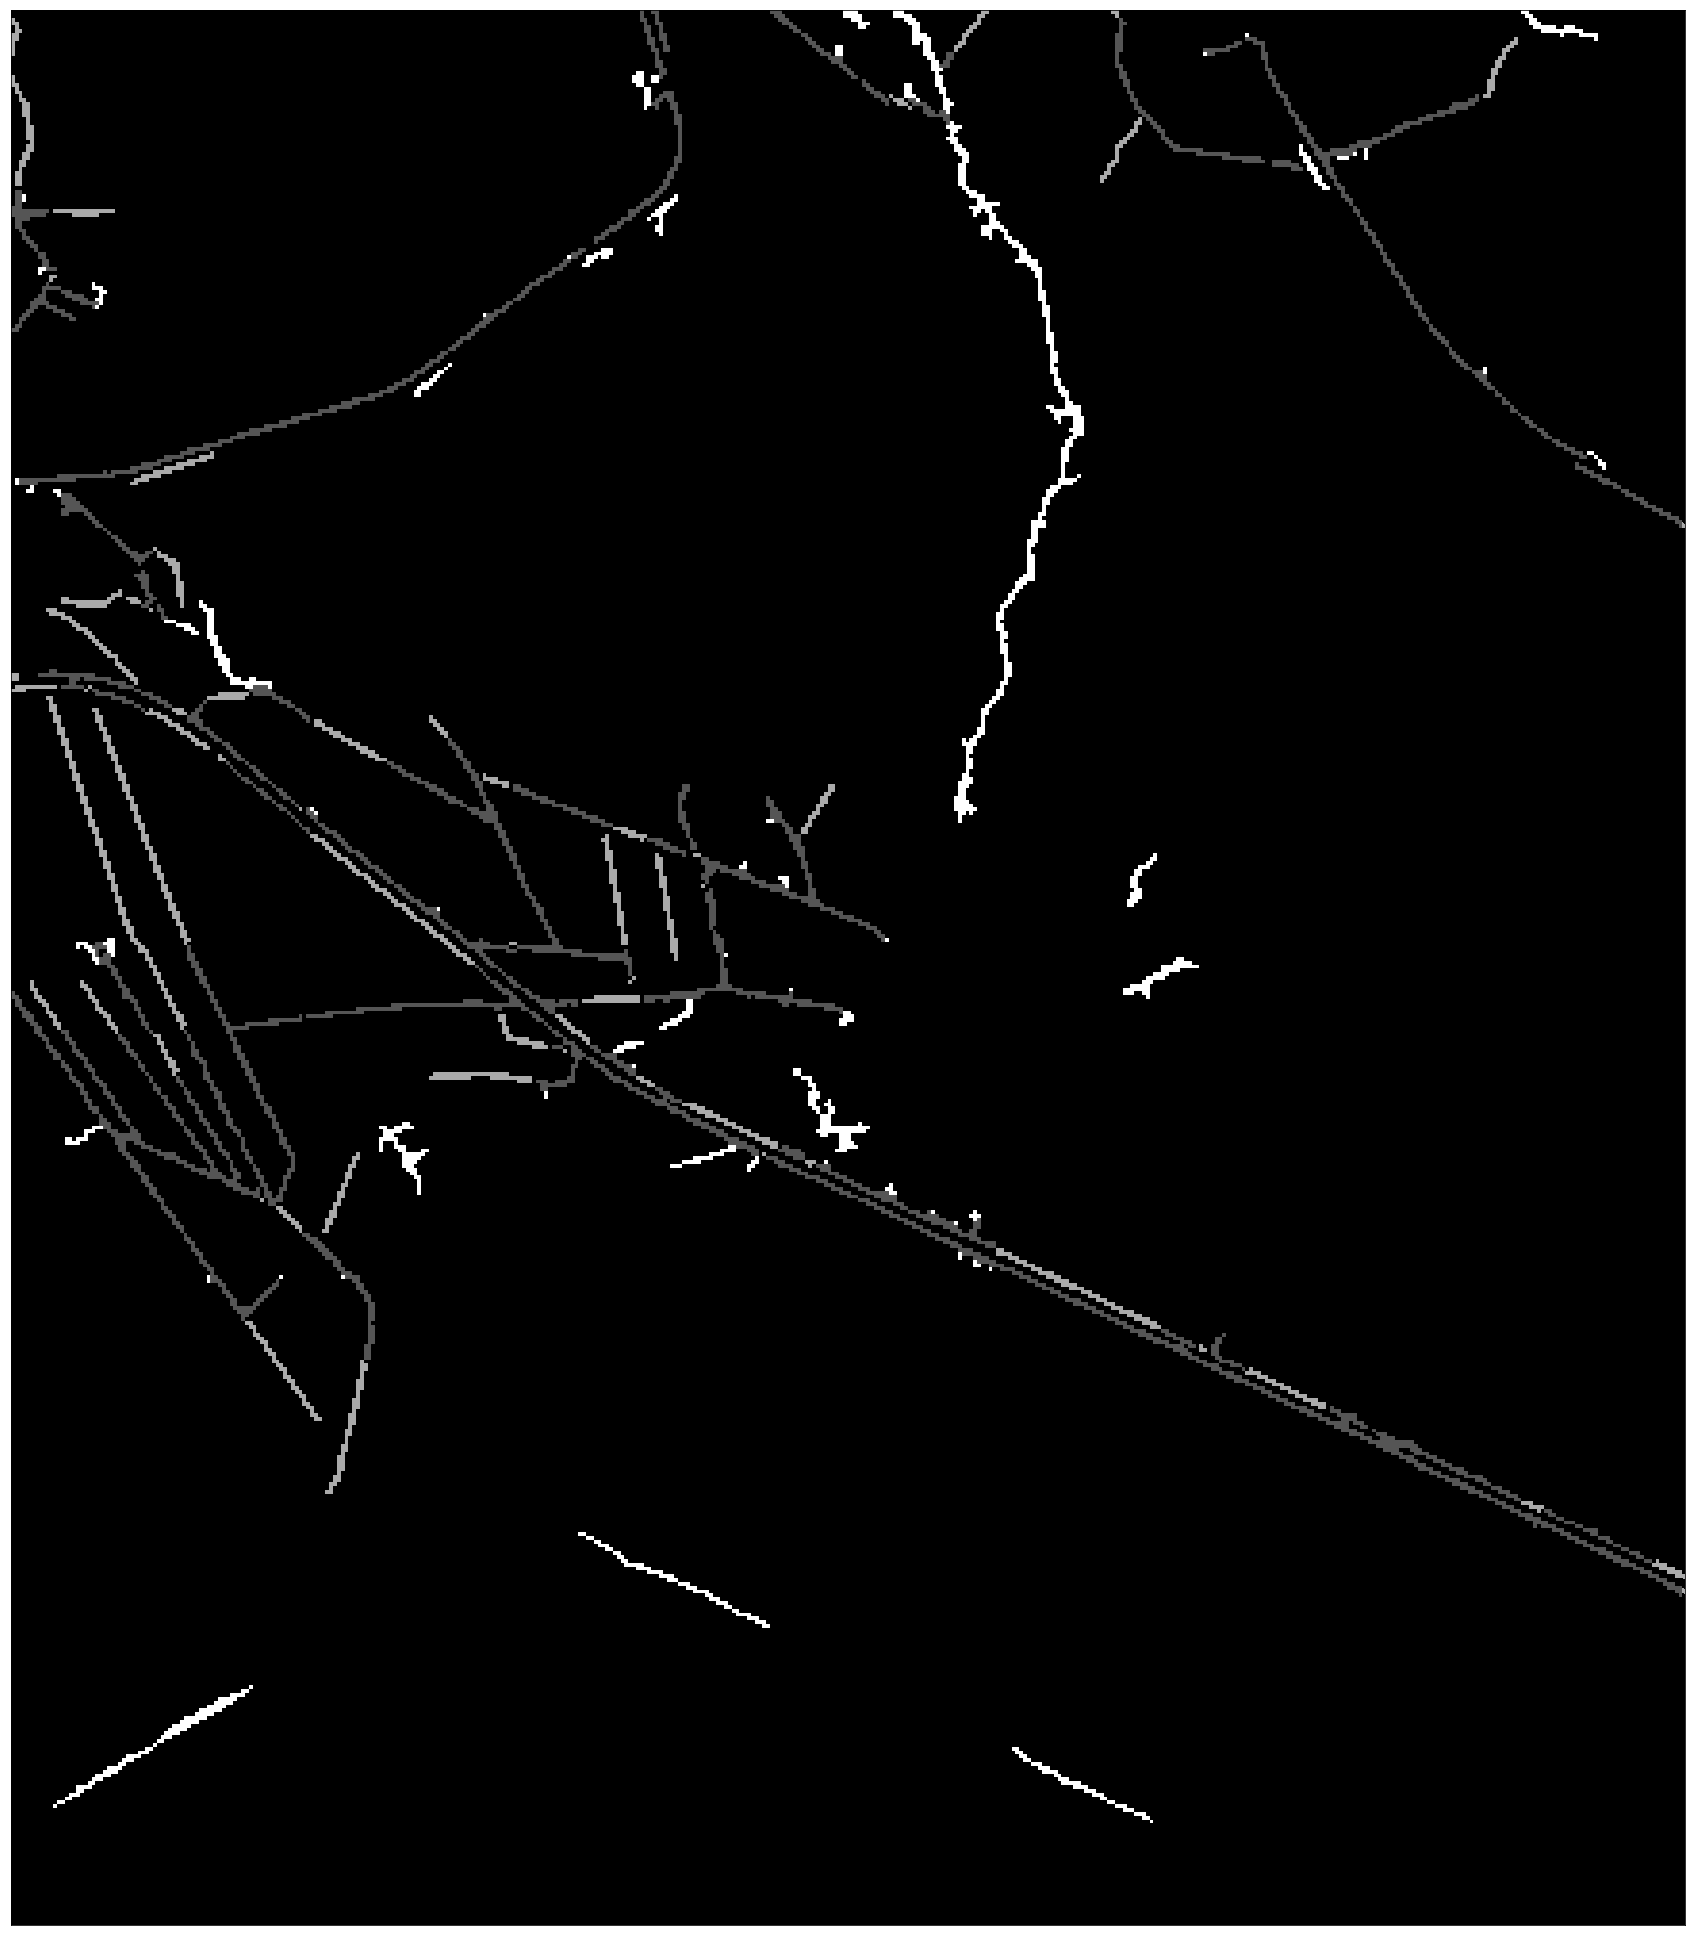

In [24]:
plt.figure(num=None, figsize=(30,40), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0.01,hspace=0)


ax[0].imshow(np.array(Image.open("../Slutexperiment/zone_results_new_labels_13.tif")), cmap="gray")

In [10]:
test = np.array(Image.open("../Slutexperiment/zone_results_new_labels_21.tif"))

In [12]:
np.unique(test)

array([0, 1, 2, 3], dtype=uint8)